In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [4]:
data = pd.read_excel(r'covid.xlsx')

In [5]:
data

Country/Region        Lat       Long       Date  Confirmed  \
0                Afghanistan  33.939110  67.709953  1.22.2020          0   
1                    Albania  41.153300  20.168300  1.22.2020          0   
2                    Algeria  28.033900   1.659600  1.22.2020          0   
3                    Andorra  42.506300   1.521800  1.22.2020          0   
4                     Angola -11.202700  17.873900  1.22.2020          0   
...                      ...        ...        ...        ...        ...   
48875  Sao Tome and Principe   0.186400   6.613100  7.27.2020        865   
48876                  Yemen  15.552727  48.516388  7.27.2020       1691   
48877                Comoros -11.645500  43.333300  7.27.2020        354   
48878             Tajikistan  38.861000  71.276100  7.27.2020       7235   
48879                Lesotho -29.610000  28.233600  7.27.2020        505   

       Deaths  Recovered  Active             WHO Region  
0           0          0       0  Eastern Mediterranean  
1           0          0       0                 Europe  
2           0          0       0                 Africa  
3           0          0       0                 Europe  
4           0          0       0                 Africa  
...       ...        ...     ...                    ...  
48875      14        734     117                 Africa  
48876     483        833     375  Eastern Mediterranean  
48877       7        328      19                 Africa  
48878      60       6028    1147                 Europe  
48879      12        128     365                 Africa  

[48880 rows x 9 columns]

In [6]:
data['Date'] = pd.to_datetime(data['Date'])  

In [7]:
data.describe(include='all')

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_37835/1336221646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all')


Country/Region           Lat          Long                 Date  \
count           48880  48880.000000  48880.000000                48880   
unique            186           NaN           NaN                  188   
top             China           NaN           NaN  2020-01-22 00:00:00   
freq             6204           NaN           NaN                  260   
first             NaN           NaN           NaN  2020-01-22 00:00:00   
last              NaN           NaN           NaN  2020-07-27 00:00:00   
mean              NaN     21.362056     23.445506                  NaN   
std               NaN     24.971423     70.565423                  NaN   
min               NaN    -51.796300   -135.000000                  NaN   
25%               NaN      7.789790    -16.237775                  NaN   
50%               NaN     23.529288     21.375600                  NaN   
75%               NaN     41.227185     81.641348                  NaN   
max               NaN     71.706900    178.065000                  NaN   

           Confirmed         Deaths     Recovered        Active WHO Region  
count   4.888000e+04   48880.000000  4.888000e+04  4.888000e+04      48880  
unique           NaN            NaN           NaN           NaN          6  
top              NaN            NaN           NaN           NaN     Europe  
freq             NaN            NaN           NaN           NaN      14852  
first            NaN            NaN           NaN           NaN        NaN  
last             NaN            NaN           NaN           NaN        NaN  
mean    1.691738e+04     887.025655  7.928616e+03  8.101734e+03        NaN  
std     1.275416e+05    6325.533632  5.490390e+04  7.640442e+04        NaN  
min     0.000000e+00       0.000000  0.000000e+00 -1.400000e+01        NaN  
25%     4.000000e+00       0.000000  0.000000e+00  0.000000e+00        NaN  
50%     1.670000e+02       2.000000  2.900000e+01  2.600000e+01        NaN  
75%     1.504250e+03      30.000000  6.600000e+02  5.922500e+02        NaN  
max     4.290259e+06  148011.000000  1.846641e+06  2.816444e+06        NaN

<Axes: xlabel='Deaths'>

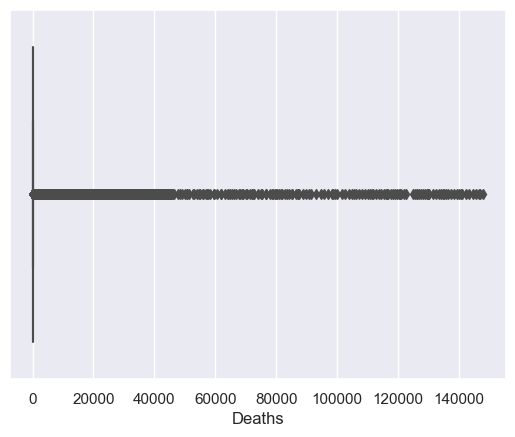

In [8]:
sns.boxplot(x="Deaths", data=data)

In [9]:
data.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
dtype: int64

In [10]:
df = pd.DataFrame(data.corr())
df

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_37835/895882342.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = pd.DataFrame(data.corr())


Lat      Long  Confirmed    Deaths  Recovered    Active
Lat        1.000000 -0.128297   0.036896  0.070454   0.015522  0.044604
Long      -0.128297  1.000000  -0.078849 -0.101223  -0.052330 -0.085638
Confirmed  0.036896 -0.078849   1.000000  0.912368   0.895503  0.950256
Deaths     0.070454 -0.101223   0.912368  1.000000   0.763099  0.891863
Recovered  0.015522 -0.052330   0.895503  0.763099   1.000000  0.713088
Active     0.044604 -0.085638   0.950256  0.891863   0.713088  1.000000

In [11]:
df['Confirmed']

Lat          0.036896
Long        -0.078849
Confirmed    1.000000
Deaths       0.912368
Recovered    0.895503
Active       0.950256
Name: Confirmed, dtype: float64

In [12]:
sns.heatmap(data.corr(),annot=True)

/var/folders/br/yvkmbr3121n8fd9q6wdmyqfm0000gp/T/ipykernel_37835/2578434383.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

In [13]:
data['WHO Region'].value_counts()

Europe                   14852
Western Pacific          10340
Africa                    9024
Americas                  8648
Eastern Mediterranean     4136
South-East Asia           1880
Name: WHO Region, dtype: int64

<Axes: xlabel='WHO Region', ylabel='count'>

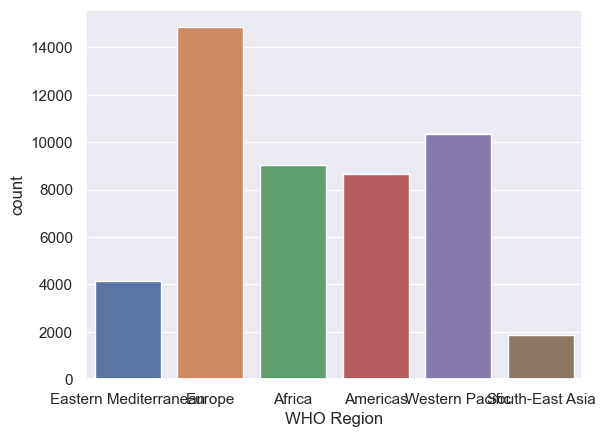

In [14]:
sns.countplot(x='WHO Region',data=data)

In [15]:
data_new = data[data['Country/Region']=='Azerbaijan']
data_new

Country/Region      Lat     Long       Date  Confirmed  Deaths  \
16        Azerbaijan  40.1431  47.5769 2020-01-22          0       0   
276       Azerbaijan  40.1431  47.5769 2020-01-23          0       0   
536       Azerbaijan  40.1431  47.5769 2020-01-24          0       0   
796       Azerbaijan  40.1431  47.5769 2020-01-25          0       0   
1056      Azerbaijan  40.1431  47.5769 2020-01-26          0       0   
...              ...      ...      ...        ...        ...     ...   
47596     Azerbaijan  40.1431  47.5769 2020-07-23      28980     391   
47856     Azerbaijan  40.1431  47.5769 2020-07-24      29312     400   
48116     Azerbaijan  40.1431  47.5769 2020-07-25      29633     408   
48376     Azerbaijan  40.1431  47.5769 2020-07-26      30050     417   
48636     Azerbaijan  40.1431  47.5769 2020-07-27      30446     423   

       Recovered  Active WHO Region  
16             0       0     Europe  
276            0       0     Europe  
536            0       0     Europe  
796            0       0     Europe  
1056           0       0     Europe  
...          ...     ...        ...  
47596      20974    7615     Europe  
47856      21547    7365     Europe  
48116      22082    7143     Europe  
48376      22684    6949     Europe  
48636      23242    6781     Europe  

[188 rows x 9 columns]

In [16]:
sns.barplot(x='Date',y='Deaths',data=data_new.sample(5))

<Axes: xlabel='Date', ylabel='Deaths'>

In [17]:
data_new_date = data_new[(data_new['Date']>= '2020-07-01')&(data_new['Date']<= '2020-07-27')]
data_new_date

Country/Region      Lat     Long       Date  Confirmed  Deaths  \
41876     Azerbaijan  40.1431  47.5769 2020-07-01      18112     220   
42136     Azerbaijan  40.1431  47.5769 2020-07-02      18684     228   
42396     Azerbaijan  40.1431  47.5769 2020-07-03      19267     235   
42656     Azerbaijan  40.1431  47.5769 2020-07-04      19801     241   
42916     Azerbaijan  40.1431  47.5769 2020-07-05      20324     250   
43176     Azerbaijan  40.1431  47.5769 2020-07-06      20837     258   
43436     Azerbaijan  40.1431  47.5769 2020-07-07      21374     265   
43696     Azerbaijan  40.1431  47.5769 2020-07-08      21916     274   
43956     Azerbaijan  40.1431  47.5769 2020-07-09      22464     284   
44216     Azerbaijan  40.1431  47.5769 2020-07-10      22990     292   
44476     Azerbaijan  40.1431  47.5769 2020-07-11      23521     298   
44736     Azerbaijan  40.1431  47.5769 2020-07-12      24041     306   
44996     Azerbaijan  40.1431  47.5769 2020-07-13      24570     313   
45256     Azerbaijan  40.1431  47.5769 2020-07-14      25113     319   
45516     Azerbaijan  40.1431  47.5769 2020-07-15      25672     326   
45776     Azerbaijan  40.1431  47.5769 2020-07-16      26165     334   
46036     Azerbaijan  40.1431  47.5769 2020-07-17      26636     341   
46296     Azerbaijan  40.1431  47.5769 2020-07-18      27133     349   
46556     Azerbaijan  40.1431  47.5769 2020-07-19      27521     354   
46816     Azerbaijan  40.1431  47.5769 2020-07-20      27890     363   
47076     Azerbaijan  40.1431  47.5769 2020-07-21      28242     376   
47336     Azerbaijan  40.1431  47.5769 2020-07-22      28633     385   
47596     Azerbaijan  40.1431  47.5769 2020-07-23      28980     391   
47856     Azerbaijan  40.1431  47.5769 2020-07-24      29312     400   
48116     Azerbaijan  40.1431  47.5769 2020-07-25      29633     408   
48376     Azerbaijan  40.1431  47.5769 2020-07-26      30050     417   
48636     Azerbaijan  40.1431  47.5769 2020-07-27      30446     423   

       Recovered  Active WHO Region  
41876      10061    7831     Europe  
42136      10425    8031     Europe  
42396      10820    8212     Europe  
42656      11291    8269     Europe  
42916      11742    8332     Europe  
43176      12182    8397     Europe  
43436      12635    8474     Europe  
43696      13100    8542     Europe  
43956      13591    8589     Europe  
44216      14093    8605     Europe  
44476      14607    8616     Europe  
44736      15093    8642     Europe  
44996      15640    8617     Europe  
45256      16150    8644     Europe  
45516      16695    8651     Europe  
45776      17256    8575     Europe  
46036      17805    8490     Europe  
46296      18450    8334     Europe  
46556      18967    8200     Europe  
46816      19490    8037     Europe  
47076      19939    7927     Europe  
47336      20443    7805     Europe  
47596      20974    7615     Europe  
47856      21547    7365     Europe  
48116      22082    7143     Europe  
48376      22684    6949     Europe  
48636      23242    6781     Europe

In [22]:
data_new_date1 = data_new[(data_new['Date'].dt.month >= 7) & (data_new['Date'].dt.month <= 7)]
data_new_date1

Country/Region      Lat     Long       Date  Confirmed  Deaths  \
41876     Azerbaijan  40.1431  47.5769 2020-07-01      18112     220   
42136     Azerbaijan  40.1431  47.5769 2020-07-02      18684     228   
42396     Azerbaijan  40.1431  47.5769 2020-07-03      19267     235   
42656     Azerbaijan  40.1431  47.5769 2020-07-04      19801     241   
42916     Azerbaijan  40.1431  47.5769 2020-07-05      20324     250   
43176     Azerbaijan  40.1431  47.5769 2020-07-06      20837     258   
43436     Azerbaijan  40.1431  47.5769 2020-07-07      21374     265   
43696     Azerbaijan  40.1431  47.5769 2020-07-08      21916     274   
43956     Azerbaijan  40.1431  47.5769 2020-07-09      22464     284   
44216     Azerbaijan  40.1431  47.5769 2020-07-10      22990     292   
44476     Azerbaijan  40.1431  47.5769 2020-07-11      23521     298   
44736     Azerbaijan  40.1431  47.5769 2020-07-12      24041     306   
44996     Azerbaijan  40.1431  47.5769 2020-07-13      24570     313   
45256     Azerbaijan  40.1431  47.5769 2020-07-14      25113     319   
45516     Azerbaijan  40.1431  47.5769 2020-07-15      25672     326   
45776     Azerbaijan  40.1431  47.5769 2020-07-16      26165     334   
46036     Azerbaijan  40.1431  47.5769 2020-07-17      26636     341   
46296     Azerbaijan  40.1431  47.5769 2020-07-18      27133     349   
46556     Azerbaijan  40.1431  47.5769 2020-07-19      27521     354   
46816     Azerbaijan  40.1431  47.5769 2020-07-20      27890     363   
47076     Azerbaijan  40.1431  47.5769 2020-07-21      28242     376   
47336     Azerbaijan  40.1431  47.5769 2020-07-22      28633     385   
47596     Azerbaijan  40.1431  47.5769 2020-07-23      28980     391   
47856     Azerbaijan  40.1431  47.5769 2020-07-24      29312     400   
48116     Azerbaijan  40.1431  47.5769 2020-07-25      29633     408   
48376     Azerbaijan  40.1431  47.5769 2020-07-26      30050     417   
48636     Azerbaijan  40.1431  47.5769 2020-07-27      30446     423   

       Recovered  Active WHO Region  
41876      10061    7831     Europe  
42136      10425    8031     Europe  
42396      10820    8212     Europe  
42656      11291    8269     Europe  
42916      11742    8332     Europe  
43176      12182    8397     Europe  
43436      12635    8474     Europe  
43696      13100    8542     Europe  
43956      13591    8589     Europe  
44216      14093    8605     Europe  
44476      14607    8616     Europe  
44736      15093    8642     Europe  
44996      15640    8617     Europe  
45256      16150    8644     Europe  
45516      16695    8651     Europe  
45776      17256    8575     Europe  
46036      17805    8490     Europe  
46296      18450    8334     Europe  
46556      18967    8200     Europe  
46816      19490    8037     Europe  
47076      19939    7927     Europe  
47336      20443    7805     Europe  
47596      20974    7615     Europe  
47856      21547    7365     Europe  
48116      22082    7143     Europe  
48376      22684    6949     Europe  
48636      23242    6781     Europe

In [20]:
data_new['Date'].min()

Timestamp('2020-01-22 00:00:00')

In [21]:
data_new['Date'].max()

Timestamp('2020-07-27 00:00:00')

In [23]:
data_new_date2 = data_new[(data_new['Date'].dt.year == 2020) & (data_new['Date'].dt.month == 7)]
data_new_date2

Country/Region      Lat     Long       Date  Confirmed  Deaths  \
41876     Azerbaijan  40.1431  47.5769 2020-07-01      18112     220   
42136     Azerbaijan  40.1431  47.5769 2020-07-02      18684     228   
42396     Azerbaijan  40.1431  47.5769 2020-07-03      19267     235   
42656     Azerbaijan  40.1431  47.5769 2020-07-04      19801     241   
42916     Azerbaijan  40.1431  47.5769 2020-07-05      20324     250   
43176     Azerbaijan  40.1431  47.5769 2020-07-06      20837     258   
43436     Azerbaijan  40.1431  47.5769 2020-07-07      21374     265   
43696     Azerbaijan  40.1431  47.5769 2020-07-08      21916     274   
43956     Azerbaijan  40.1431  47.5769 2020-07-09      22464     284   
44216     Azerbaijan  40.1431  47.5769 2020-07-10      22990     292   
44476     Azerbaijan  40.1431  47.5769 2020-07-11      23521     298   
44736     Azerbaijan  40.1431  47.5769 2020-07-12      24041     306   
44996     Azerbaijan  40.1431  47.5769 2020-07-13      24570     313   
45256     Azerbaijan  40.1431  47.5769 2020-07-14      25113     319   
45516     Azerbaijan  40.1431  47.5769 2020-07-15      25672     326   
45776     Azerbaijan  40.1431  47.5769 2020-07-16      26165     334   
46036     Azerbaijan  40.1431  47.5769 2020-07-17      26636     341   
46296     Azerbaijan  40.1431  47.5769 2020-07-18      27133     349   
46556     Azerbaijan  40.1431  47.5769 2020-07-19      27521     354   
46816     Azerbaijan  40.1431  47.5769 2020-07-20      27890     363   
47076     Azerbaijan  40.1431  47.5769 2020-07-21      28242     376   
47336     Azerbaijan  40.1431  47.5769 2020-07-22      28633     385   
47596     Azerbaijan  40.1431  47.5769 2020-07-23      28980     391   
47856     Azerbaijan  40.1431  47.5769 2020-07-24      29312     400   
48116     Azerbaijan  40.1431  47.5769 2020-07-25      29633     408   
48376     Azerbaijan  40.1431  47.5769 2020-07-26      30050     417   
48636     Azerbaijan  40.1431  47.5769 2020-07-27      30446     423   

       Recovered  Active WHO Region  
41876      10061    7831     Europe  
42136      10425    8031     Europe  
42396      10820    8212     Europe  
42656      11291    8269     Europe  
42916      11742    8332     Europe  
43176      12182    8397     Europe  
43436      12635    8474     Europe  
43696      13100    8542     Europe  
43956      13591    8589     Europe  
44216      14093    8605     Europe  
44476      14607    8616     Europe  
44736      15093    8642     Europe  
44996      15640    8617     Europe  
45256      16150    8644     Europe  
45516      16695    8651     Europe  
45776      17256    8575     Europe  
46036      17805    8490     Europe  
46296      18450    8334     Europe  
46556      18967    8200     Europe  
46816      19490    8037     Europe  
47076      19939    7927     Europe  
47336      20443    7805     Europe  
47596      20974    7615     Europe  
47856      21547    7365     Europe  
48116      22082    7143     Europe  
48376      22684    6949     Europe  
48636      23242    6781     Europe

In [97]:
df = data_new_date.groupby(['Country/Region']).agg({'Confirmed':'sum','Deaths':'sum','Recovered':'sum','Active':'sum'})
df

Confirmed  Deaths  Recovered  Active
Country/Region                                      
Azerbaijan         669327    8650     441004  219673